# Monte Carlo Solver: Birth and Death of Photons in a Cavity

Authors: J.R. Johansson and P.D. Nation

Modifications: C. Staufenbiel (2022)

### Introduction

In this tutorial we demonstrate the *Monte Carlo Solver* functionality implemented in `qutip.mcsolve()`. For more information on the *MC Solver* refer to the [QuTiP documentation](https://qutip.readthedocs.io/en/latest/guide/dynamics/dynamics-monte.html). 

We aim to reproduce the experimental results from:



>  Gleyzes et al., "Quantum jumps of light recording the birth and death of a photon in a cavity", [Nature **446**,297 (2007)](http://dx.doi.org/10.1038/nature05589).


In particular, we will simulate the creation and annihilation of photons inside an optical cavity due to the thermal environment when the initial cavity is a single-photon Fock state $ |1\rangle$, as presented in Fig. 3 from the article.

## Imports
First we import the relevant functionalities:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from qutip import about, basis, destroy, mcsolve, mesolve

%matplotlib inline

## System Setup
In this example, we consider a simple oscillator Hamiltonian $H = a^\dagger a$ and one initial photon in the cavity.

In [2]:
N = 5  # number of modes in the
a = destroy(N)  # Destroy operator
H = a.dag() * a  # oscillator Hamiltonian
psi0 = basis(N, 1)  # Initial Fock state with one photon

The coupling to the external heat bath is described by a coupling constant $\kappa$ and the temperature of the heat bath is defined via the average photon number $\langle n \rangle$. In QuTiP the interaction between the system and heat bath is defined via the collapse operators. For this example, there are two collapse operators. One for photon annihilation ($C_1$) and one for photon creation ($C_2$): 

$C_1 = \sqrt{\kappa (1 + \langle n \rangle)} \; a$

$C_2 = \sqrt{\kappa \langle n \rangle} \; a^\dagger$

We give some numerical values to the coupling constant $\kappa$ and the average photon number of the heat bath $\langle n \rangle$.

In [3]:
kappa = 1.0 / 0.129  # Coupling rate to heat bath
nth = 0.063  # Temperature with <n>=0.063

# collapse operators for the thermal bath
c_ops = []
c_ops.append(np.sqrt(kappa * (1 + nth)) * a)
c_ops.append(np.sqrt(kappa * nth) * a.dag())

## Monte Carlo Simulation
The *Monte Carlo Solver* allows simulating an individual realization of the system dynamics. This is in contrast to e.g. the *Master Equation Solver*, which solves for the ensemble average over many identical realizations of the system. `qutip.mcsolve()` also offers to average over many runs of identical system setups by passing the *number of trajectories* `ntraj` to the function. If we choose `ntraj = 1` the system is only simulated once and we see it's dynamics. If we choose a large value for `ntraj`, the predictions will be averaged and therefore converge to the solution from `qutip.mesolve()`. 

We can also pass a list to `ntraj`. `qutip.mcsolve()` will calculate the results for the specified number of trajectories. Note that the entries need to be in ascending order, as the previous results are reused.

Here we are interested in the time evolution of $a^\dagger a$ for different numbers of `ntraj`. We will compare the results to the predictions by `qutip.mesolve().

In [4]:
ntraj = [1, 5, 15, 904]  # number of MC trajectories
mc = []  # MC results
tlist = np.linspace(0, 0.8, 100)

# Solve using MCSolve for different ntraj
for n in ntraj:
    result = mcsolve(H, psi0, tlist, c_ops, [a.dag() * a], ntraj=n)
    mc.append(result)
me = mesolve(H, psi0, tlist, c_ops, [a.dag() * a])

100.0%. Run time:   0.00s. Est. time left: 00:00:00:00


Total run time:   0.00s
20.0%. Run time:   0.00s. Est. time left: 00:00:00:00


40.0%. Run time:   0.00s. Est. time left: 00:00:00:00


60.0%. Run time:   0.00s. Est. time left: 00:00:00:00


80.0%. Run time:   0.00s. Est. time left: 00:00:00:00


100.0%. Run time:   0.01s. Est. time left: 00:00:00:00


Total run time:   0.01s
13.3%. Run time:   0.00s. Est. time left: 00:00:00:00


20.0%. Run time:   0.00s. Est. time left: 00:00:00:00


33.3%. Run time:   0.00s. Est. time left: 00:00:00:00


40.0%. Run time:   0.01s. Est. time left: 00:00:00:00


53.3%. Run time:   0.01s. Est. time left: 00:00:00:00


60.0%. Run time:   0.01s. Est. time left: 00:00:00:00


73.3%. Run time:   0.01s. Est. time left: 00:00:00:00


80.0%. Run time:   0.01s. Est. time left: 00:00:00:00


93.3%. Run time:   0.02s. Est. time left: 00:00:00:00


100.0%. Run time:   0.02s. Est. time left: 00:00:00:00


Total run time:   0.02s
10.1%. Run time:   0.08s. Est. time left: 00:00:00:00


20.0%. Run time:   0.16s. Est. time left: 00:00:00:00


/home/runner/miniconda3/envs/test-environment-v5/lib/python3.12/site-packages/qutip/solver/solver_base.py:576: FutureWarning: e_ops will be keyword only from qutip 5.3 for all solver
  warnings.warn(


30.1%. Run time:   0.24s. Est. time left: 00:00:00:00


40.0%. Run time:   0.32s. Est. time left: 00:00:00:00


50.0%. Run time:   0.40s. Est. time left: 00:00:00:00


60.1%. Run time:   0.48s. Est. time left: 00:00:00:00


70.0%. Run time:   0.56s. Est. time left: 00:00:00:00


80.1%. Run time:   0.64s. Est. time left: 00:00:00:00


90.0%. Run time:   0.72s. Est. time left: 00:00:00:00


100.0%. Run time:   0.80s. Est. time left: 00:00:00:00


Total run time:   0.80s


## Reproduce plot from article
Using the above results we can reproduce Fig. 3 from the article mentioned above. The individual figures plot the time evolution of $\langle a^\dagger a \rangle$ for the system we set up above. The effect of using different `ntraj` for the simulation using `mcsolve` is shown. When choosing `ntraj = 1` we see the dynamics of one particular quantum system. If `ntraj > 1` the output is averaged over the number of realizations. 

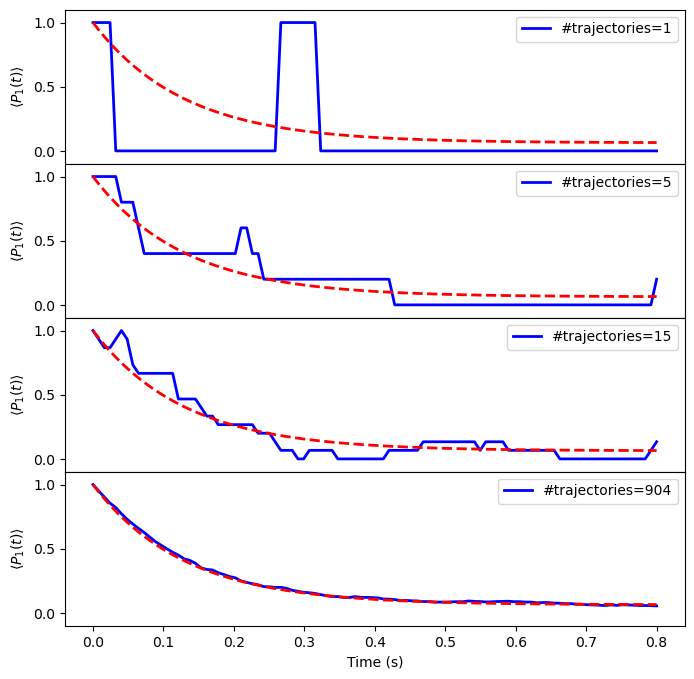

In [5]:
fig = plt.figure(figsize=(8, 8), frameon=False)
plt.subplots_adjust(hspace=0.0)

for i in range(len(ntraj)):
    ax = plt.subplot(4, 1, i + 1)
    ax.plot(
        tlist, mc[i].expect[0], "b", lw=2,
        label="#trajectories={}".format(ntraj[i])
    )
    ax.plot(tlist, me.expect[0], "r--", lw=2)
    ax.set_yticks([0, 0.5, 1])
    ax.set_ylim([-0.1, 1.1])
    ax.set_ylabel(r"$\langle P_{1}(t)\rangle$")
    ax.legend()

ax.set_xlabel(r"Time (s)");

## About

In [6]:
about()


QuTiP: Quantum Toolbox in Python
Copyright (c) QuTiP team 2011 and later.
Current admin team: Alexander Pitchford, Nathan Shammah, Shahnawaz Ahmed, Neill Lambert, Eric Giguère, Boxi Li, Simon Cross, Asier Galicia, Paul Menczel, and Patrick Hopf.
Board members: Daniel Burgarth, Robert Johansson, Anton F. Kockum, Franco Nori and Will Zeng.
Original developers: R. J. Johansson & P. D. Nation.
Previous lead developers: Chris Granade & A. Grimsmo.
Currently developed through wide collaboration. See https://github.com/qutip for details.

QuTiP Version:      5.2.0.dev0+4033695
Numpy Version:      2.2.4
Scipy Version:      1.15.2
Cython Version:     3.0.12
Matplotlib Version: 3.10.1
Python Version:     3.12.0
Number of CPUs:     4
BLAS Info:          Generic
INTEL MKL Ext:      None
Platform Info:      Linux (x86_64)
Installation path:  /home/runner/miniconda3/envs/test-environment-v5/lib/python3.12/site-packages/qutip

Installed QuTiP family packages
-------------------------------



qutip-jax: 0.1.1.dev5
qutip-qtrl: 0.2.0.dev0+acb71a0
qutip-qip: 0.5.0.dev0+d58a82d

Please cite QuTiP in your publication.
For your convenience a bibtex reference can be easily generated using `qutip.cite()`


## Testing

In [7]:
np.testing.assert_allclose(me.expect[0], mc[3].expect[0], atol=10**-1)
assert np.all(np.diff(me.expect[0]) <= 0)